In [1]:
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
plt.style.use('jupyter_dark')

---
# 1. CIRCUITS

## Question 1.1

**What is the output of the following circuit given initial state of $| 0 \rangle$ ?**

<img src="..\images\circuits_images\hx0.png" align = "left" width="200"/>

**1)** $| 0 \rangle$

**2)** $\frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}}$

**3)** $\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$

**4)** Both 2 & 3 are possible

**5)** None of the above

In [2]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

In [5]:
ψ0 = Statevector([1,0])
ψ0

<IPython.core.display.Latex object>

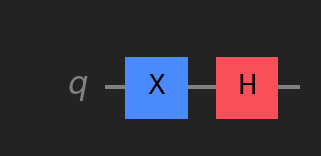

In [6]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw()

In [7]:
ψ2 = ψ0.evolve(qc)
ψ2

<IPython.core.display.Latex object>

---
## Question 1.2

**What is the result of the measurements in the following circuit assuming error-free quantum computation?**

<img src="..\images\circuits_images\bell.png" align="left" width="400"/>

**1)** 50% 0 and 50% 1

**2)** 50% 00 and 50% 11

**3)** 100% 1

**4)** Both 1 & 2 are possible

**5)** None of the above

In [8]:
from qiskit import QuantumCircuit

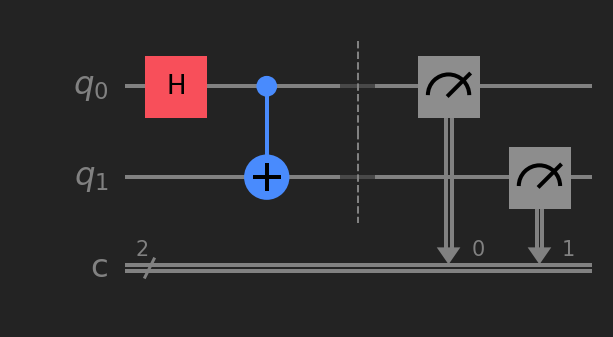

In [9]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw()

In [10]:
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram

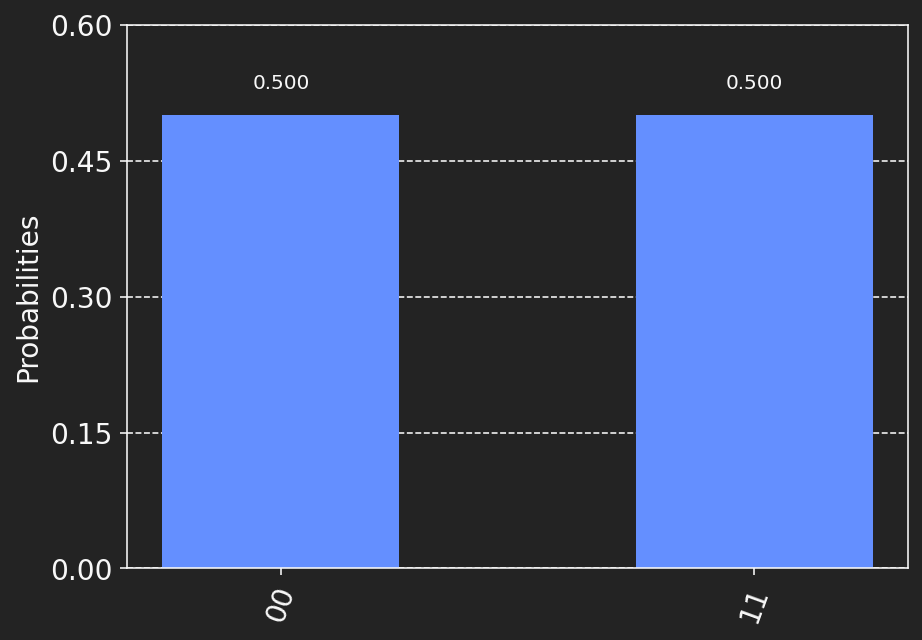

In [14]:
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(qc, shots = 4096)
results = job.result()
counts = results.get_counts(qc)
plot_histogram(counts)

---
## Question 1.3

**Consider the three-qubit quantum circuit below. What are the real and imaginary components of the state vector?**

<img src="..\images\circuits_images\q1.png" align="left" width="300"/>

**1)** <img src="..\images\circuits_images\q1_a1.png" width = "800"/>

**2)** <img src="..\images\circuits_images\q1_a2.png" width = "800"/>

**3)** <img src="..\images\circuits_images\q1_a3.png" width = "800"/>

**4)** <img src="..\images\circuits_images\q1_a4.png" width = "800"/>

**5)** None of the above


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix

In [3]:
ψin = Statevector.from_int(0,8)
ψin

<IPython.core.display.Latex object>

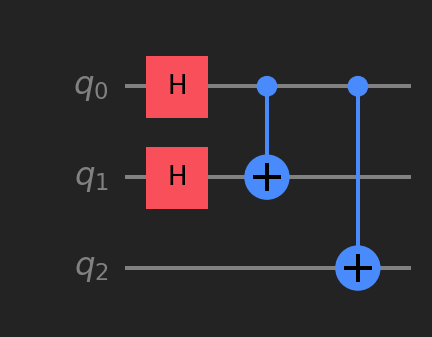

In [4]:
qc = QuantumCircuit(3)
qc.h([0,1])
qc.cx(0,1)
qc.cx(0,2)
qc.draw()

In [5]:
ψout = ψin.evolve(qc)
ψout

<IPython.core.display.Latex object>

In [6]:
from qiskit.tools.visualization import plot_state_city

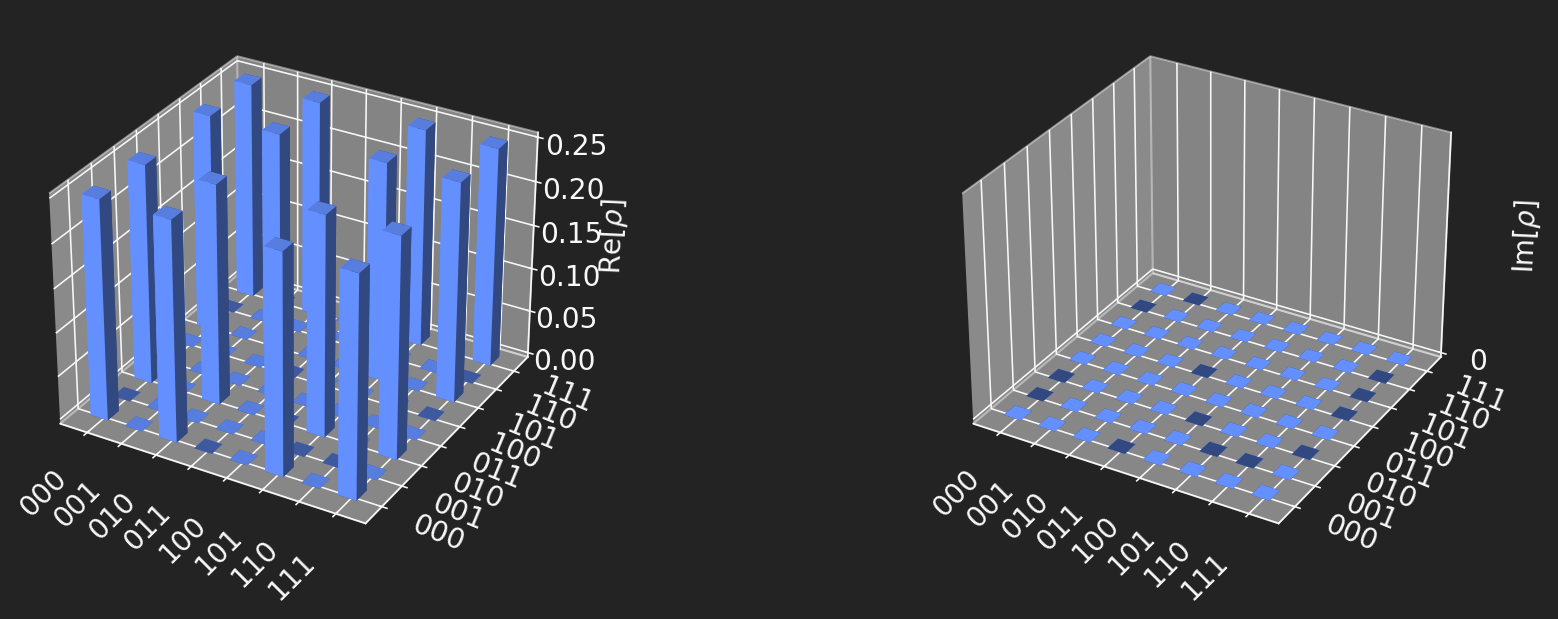

In [7]:
plot_state_city(ψout)

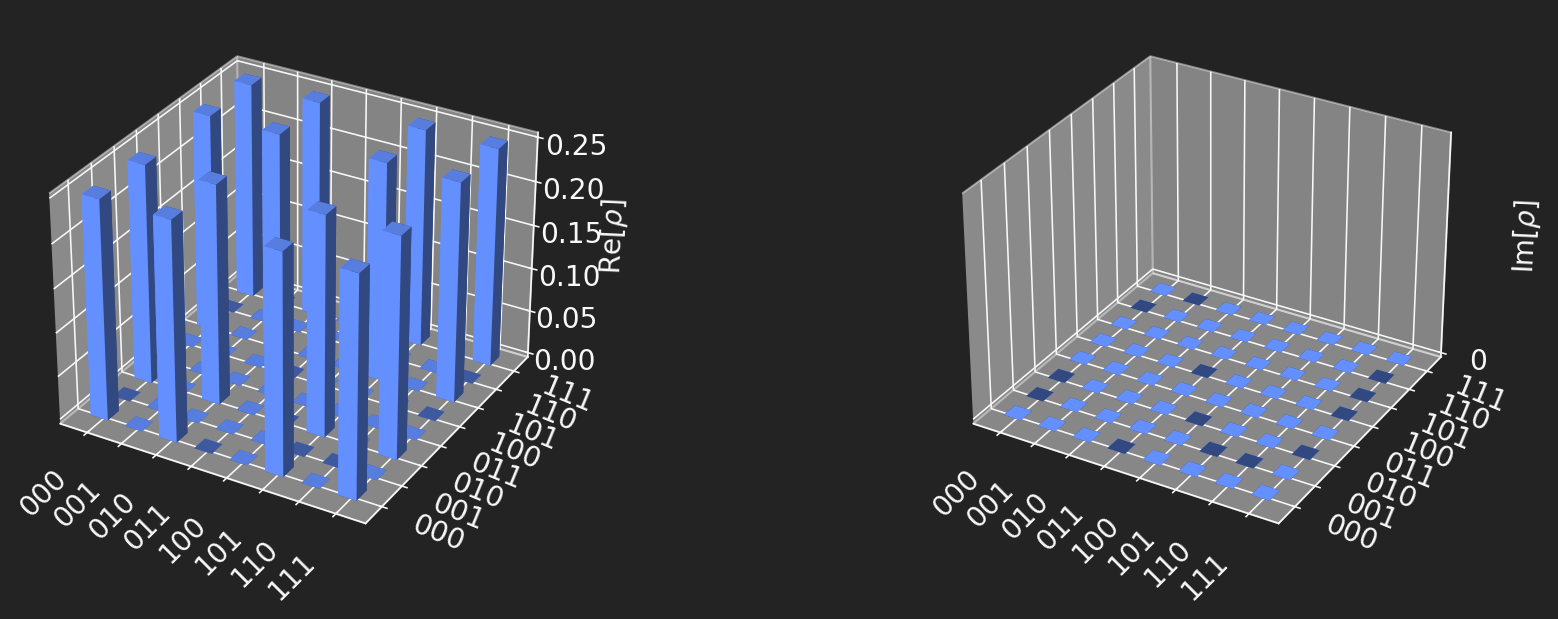

In [8]:
ψout.draw('city')

In [9]:
ρout = DensityMatrix(ψout)
ρout

<IPython.core.display.Latex object>

---
## Question 1.4

Which of the following state visualization represent the same quantum state as shown in this qsphere?

<img src="..\images\circuits_images\qsphere.png" align="left" width="350"/>

**1)** <img src="..\images\circuits_images\statecity.png"/>

**2)** <img src="..\images\circuits_images\hinton.png"/>

**3)** <img src="..\images\circuits_images\paulivec.png"/>

**4)** <img src="..\images\circuits_images\bloch_sphere.png"/>

**5)** None of the above

In [10]:
from qiskit.quantum_info import Statevector, DensityMatrix
import numpy as np

In [11]:
ψ = 1/np.sqrt(2) * Statevector([1,0,0,-1])
ψ

<IPython.core.display.Latex object>

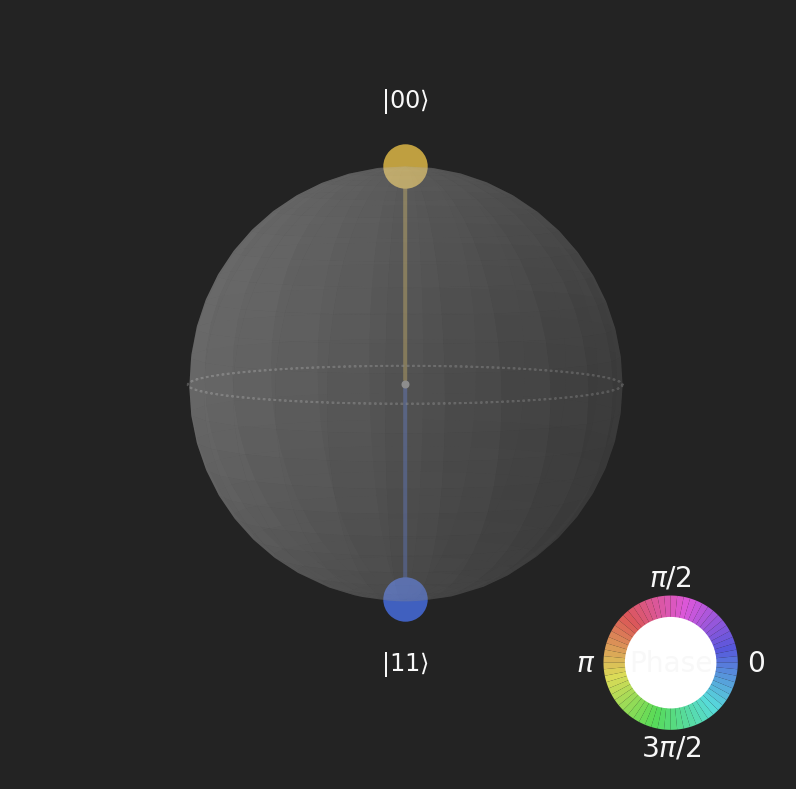

In [12]:
ψ.draw('qsphere')

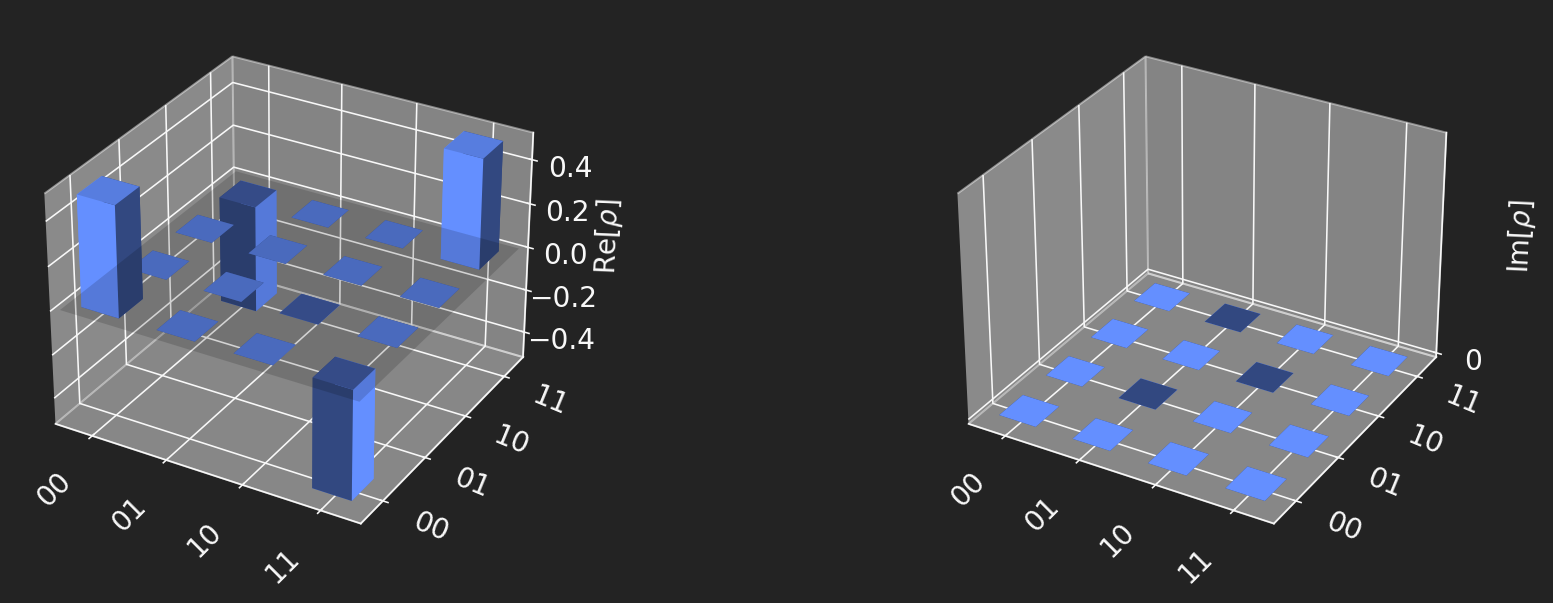

In [13]:
ψ.draw('city')

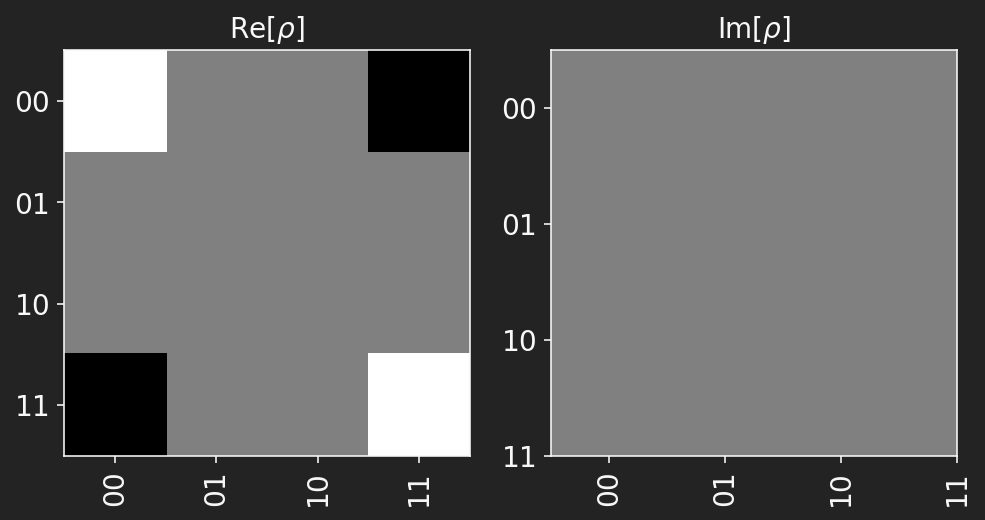

In [15]:
ψ.draw('hinton')

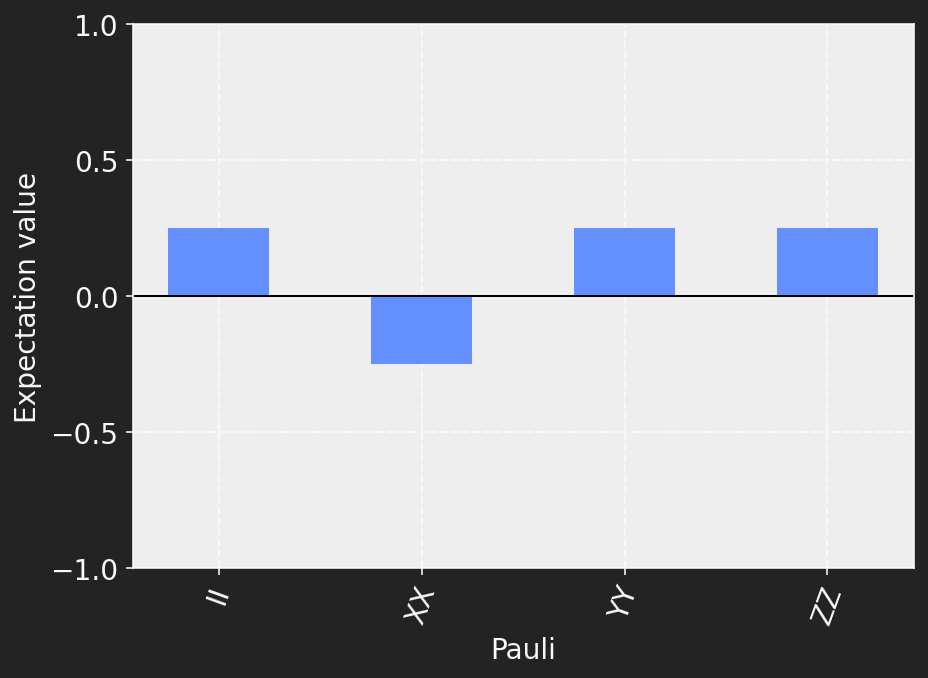

In [16]:
ψ.draw('paulivec')

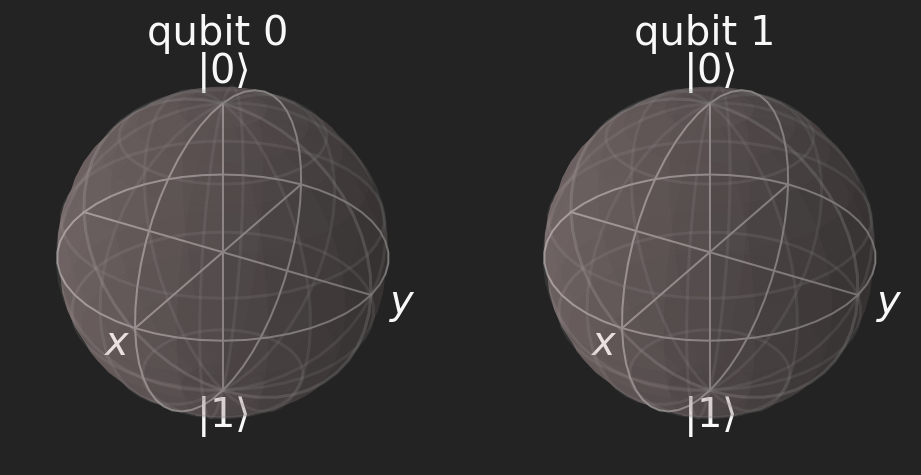

In [17]:
ψ.draw('bloch')

---
## Question 1.5

Which one of the following gates is different from the rest?

**1)** U1Gate(pi)

**2)** U2Gate(0, pi)

**3)** U3Gate(pi/2, 0, pi)

**4)** HGate()

**5)** None of the above

In [18]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.tools.visualization import array_to_latex
import numpy as np

/var/folders/f7/n0rc7kws02nb89k_cyf2mylr0000gn/T/ipykernel_6066/3506241057.py:2: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(np.pi,0)


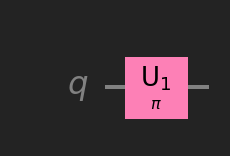

In [19]:
qc = QuantumCircuit(1)
qc.u1(np.pi,0)
qc.draw()

In [20]:
U1op = Operator(qc)
array_to_latex(U1op)

<IPython.core.display.Latex object>

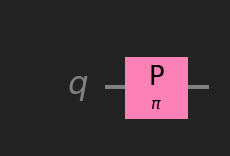

In [21]:
qc = QuantumCircuit(1)
qc.p(np.pi,0)
qc.draw()

In [22]:
Pop = Operator(qc)
array_to_latex(Pop)

<IPython.core.display.Latex object>

/var/folders/f7/n0rc7kws02nb89k_cyf2mylr0000gn/T/ipykernel_6066/2298775900.py:2: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(0,np.pi,0)


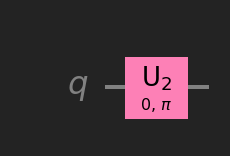

In [23]:
qc = QuantumCircuit(1)
qc.u2(0,np.pi,0)
qc.draw()

In [24]:
U2Op = Operator(qc)
array_to_latex(U2Op)

<IPython.core.display.Latex object>

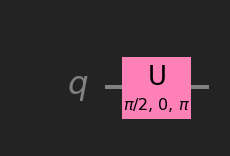

In [29]:
qc = QuantumCircuit(1)
qc.u(np.pi/2,0,np.pi,0)
qc.draw()

In [30]:
UOp = Operator(qc)
array_to_latex(UOp)

<IPython.core.display.Latex object>